<a href="https://colab.research.google.com/github/ritiksaini469/TSF-Data-Science-Internship/blob/main/Task_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP : The Sparks Foundation**
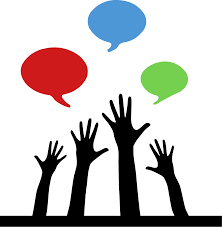

### **Data Science & Business Analytics Intern**

### **Author:  Ritik Saini**


### **Task 1 : Prediction using Supervised ML**


***In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the number of hour studied and the target value is the percentage score. This can be solved using simple linear regression.***

**Dataset :-** https://bit.ly/task1-dataset

### **Step 1 - Importing Libraries**

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
# Reading data from remote link
url = "https://bit.ly/task1-dataset"
data = pd.read_csv(url) 
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**DataFrame - head() Function**

**The head() function is used to get the first n rows. This function returns the first n rows for the object based on position.**

In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**DataFrame - tail() Function**

**The tail() function is used to get the last n rows. This function returns the last n rows from the object based on position.**

In [ ]:
data.shape

(25, 2)

**DataFrame - shape Function**

**The shape function is used to find the number of rows and columns.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Pandas DataFrame info() Method**

**The info() method prints information about the DataFrame.**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Pandas DataFrame describe() Method**

**The describe() method returns description of the data in the DataFrame.**

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Dataframe. isnull().sum().**

**Returns the number of missing values in the data set.**

# **Step 2 - Visualizing Dataset**

To plot the dataset and check the relation between the variables

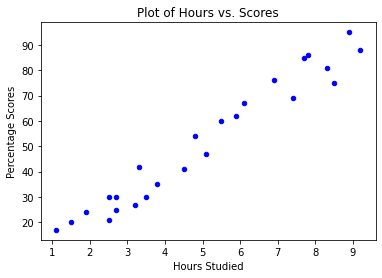

In [ ]:
data.plot(kind='scatter', x='Hours', y='Scores', color='blue')
plt.title('Plot of Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

**Hence, the graph shows a positive linear relation between the number of hours studied and percentage of score. The percentage score increases as the hours studied increases.**

# **Step 3 - Data Preparation**

The next step is to divide the data into "attributes"(Inputs) and "labels"(Outputs).

In [ ]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# **Step 4. Training The Algorithm**

**Splitting the data into training and testing sets, and training the algorithm**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (20, 1) (20,)
Test set: (5, 1) (5,)


**Divided the data into training and testing sets and hence trained the model.**


# **Step 5. Plotting the Line of Regression**

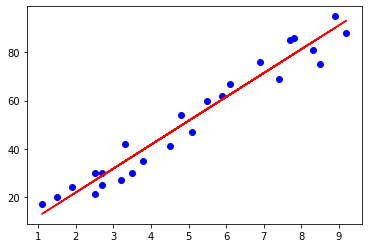

In [ ]:
line = regr.coef_*x+regr.intercept_


plt.scatter(x,y,color='blue')
plt.plot(x,line,'-r')
plt.show()

**This is the visualization of the best-fit line of regression.**

# **Step 5 - Making Predictions**

In [ ]:
# Testing data - In hours
print(x_test)
# Model Prediction 
y_pred = regr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
y_test

array([20, 27, 69, 30, 62])

# **Step 7. Comparing Actual result to the Predicted Model result**

In [ ]:
# Comparing Actual vs Predicted
cp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
cp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Estimating training and test score
print("Training Score:",regr.score(x_train,y_train))
print("Test Score:",regr.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


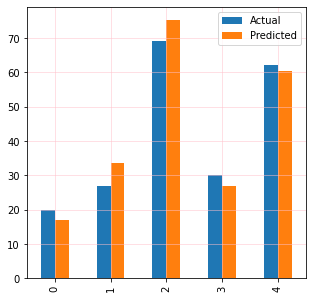

In [ ]:
#Plotting the Bar graph to depict the difference between the actual and predicted value

cp.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='pink')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

# **Step 8. Testing the model with our own data**

In [ ]:
hrs = np.array(9.25)
hrs = hrs.reshape(-1, 1)
pred = regr.predict(hrs)
print("No. of Hours Studied = {}".format(hrs[0][0]))
print("Predicted Score = {}".format(pred[0]))

No. of Hours Studied = 9.25
Predicted Score = 93.69173248737539


**If the number of hours studied is 9.25 hrs/day, the predicted score would be 93.69173248737539.**

# **Step 6 - Evaluating The Model**
The final step is to evaluate the performance of model. This step is particularly important to compare how well different models perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Square:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Square: 0.9454906892105354


R-2 gives the score of model fit.

In this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

### Conclusion

Succeesfully predicted the task using Supervised ML and was able to evaluate the model's performance based on various parameters.

### Thank You !